<a href="https://colab.research.google.com/github/BorisOskolkov/MLcourse/blob/main/asng02/A02_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Made by Boris Oskolkov for Assignment03 (CS5783)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import string
import pandas as pd
from IPython.display import Image

# Define activation function
def sigmoid(z):
	return 1/(1 + np.exp(-z))

def sigmoid_derivative(z):
  return sigmoid(z)*(1-sigmoid(z))

 --------- start of a first problem --------------

So, we need to create update rule for 2-layer regression model. For that we need to find how to calculate changing of weights and biases for 1st and 2nd layer. Assume, that we have simple 1-perceptron model. I will use chain rule for deriving the update rule.

Denote x as input, y as output, z(n) as linear equation of nth layer, σ(z) is activation function - sigmoid, a(n) as output of nth layer. L is for the loss between output layer and training data (we use MSE). So, our model will looks like the following. 

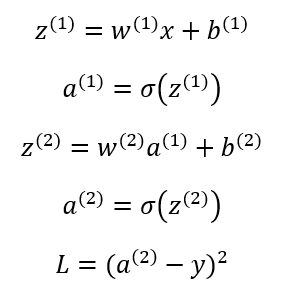

To derive update rule, we have to find following terms (we need update weights and biases).

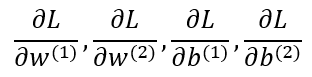

To find these terms I will apply chain rule. All calculations presented below

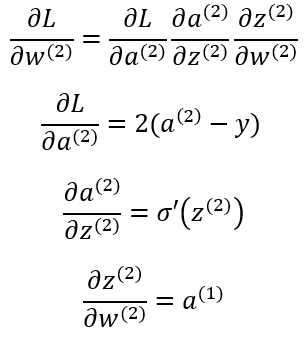

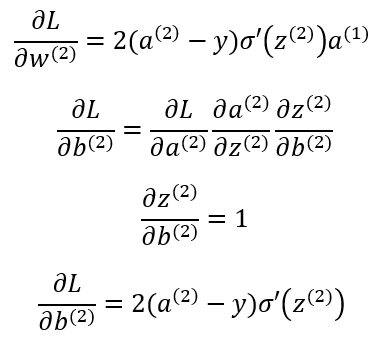

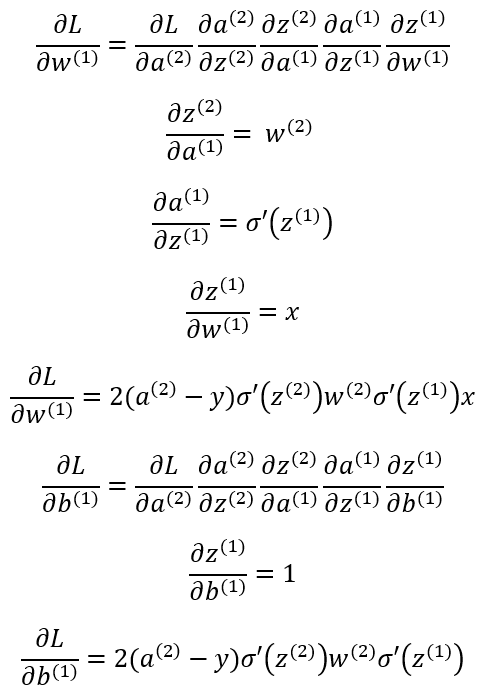

So, update rule will follow:

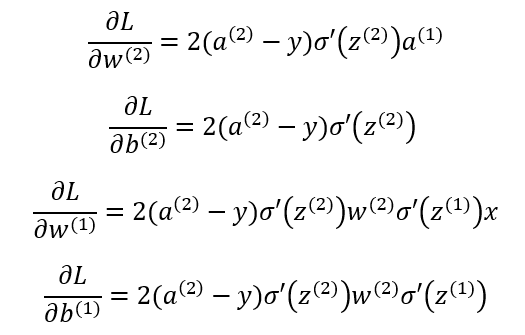

The difference, which i see between applying log-loss error and MSE error is that MSE error drive learning 2 times faster.

--------- end of a first problem --------------

--------- start of a second problem --------------

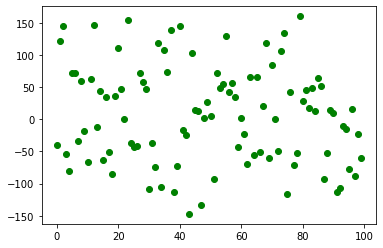

In [8]:
# Define given data
x = np.loadtxt("X_train.csv")
y = np.loadtxt("Y_train.csv")
plt.plot(y, 'go')
plt.show()


**Answer to the first question:**


I see that train output in range [-150;150]. So, I will use linear activation function for output layer to let our network output these numbers. 

In [9]:
print(f'X\'s shape is {np.shape(x)}')
print(f'Y\'s shape is {np.shape(y)}')

X's shape is (100, 2)
Y's shape is (100,)


**Answer to the second question:**

I will use three neurons in hidden layer and one in output layer, since we have 100 entries for 2 features and 100 values in output data. For that I will initialize weights and biases for every neuron.

Let's do forward pass.

In [170]:
# Define weights and biases
# first neuron in first layer
W11 = np.random.rand(2,1)
b11 = np.random.rand(1,)
# second neuron in first layer
W12 = np.random.rand(2,1)
b12 = np.random.rand(1,)
# third neuron in first layer
W13 = np.random.rand(2,1)
b13 = np.random.rand(1,)
# output neuron in second layer
W2 = np.random.rand(1,3)
b2 = np.random.rand(1,)

In [174]:
# Fwd Pass
z11 = np.sum(W11.T*x, axis=1) + b11
z12 = np.sum(W12.T*x, axis=1) + b12
z13 = np.sum(W13.T*x, axis=1) + b13
a1 = np.array([sigmoid(z11), sigmoid(z12), sigmoid(z13)])

z2 = np.sum(W2.T*a1, axis=0) + b2
a2 = z2
# # Initial output
print("Prediction:", a2, "Actual:", y)
mse = np.sum((a2-y)**2)/100
print(f"MSE is equal to {mse}")

Prediction: [1.82334074 2.5000462  2.61647826 1.98339725 1.31919978 2.5282257
 2.34140537 1.95353734 2.28083608 1.81670761 1.7153584  2.17587393
 2.54617165 1.56207227 2.61334295 1.90853559 2.1504311  1.86778166
 1.80827927 2.44709038 2.41152909 2.23239216 1.8347061  2.51802128
 2.10010384 1.90552795 2.31498887 2.49366019 2.37955103 2.61287963
 1.7172511  2.04890877 1.77756403 2.42636737 1.34826821 2.39737124
 2.36844748 2.59636702 1.26335109 2.15771005 2.56524245 2.05640632
 1.79260298 1.36844866 2.29604494 2.23111965 2.19273313 1.23064692
 2.2415563  2.19946333 2.27971395 1.32830627 2.47713913 2.30876489
 2.31030905 2.45762867 2.1243061  2.4101843  2.41064056 1.95383512
 2.03987307 2.12021431 1.20274204 2.28985631 1.51970869 2.22217578
 1.65914715 2.14970188 2.56269322 1.94410538 2.35783352 2.08967691
 2.01300631 2.68750916 2.56719025 1.66521169 2.06380652 1.68366398
 1.85835728 2.62598401 2.28251728 2.29827347 2.23852942 2.54712756
 1.94308387 2.56706378 1.91033304 1.57469473 1.5892

In [182]:
# Backward pass

# Compute gradients
dz2 = (a2 - y)
dW2 = np.dot(dz2, a1.T)
db2 = dz2
dz11 = W2.T*dz2*sigmoid_derivative(z11)
dz12 = W2.T*dz2*sigmoid_derivative(z12)
dz13 = W2.T*dz2*sigmoid_derivative(z13)
dW11 = dz11*x
dW12 = dz12*x
dW13 = dz13*x
db11 = dz11
db12 = dz12
db13 = dz13


# # Update weights
# W1 = W1 - dW1
# W2 = W2 - dW2
# b1 = b1 - db1
# b2 = b2 - db2

ValueError: ignored

--------- end of a second problem --------------